# Marinade Simulation Data Prep

TVL DataFrame

In [126]:
import pandas as pd
import json

file_path = r'/Users/zachdenton1gmail.com/Documents/MDME Simulation/MarinadeAnalysis/Marinade/marinade_tvl_data/data/marinade_tvl.json'

try:
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Extract the 'tvl' object
    tvl_data = data['tvl'] 
    marinade_tvl_df = pd.DataFrame(tvl_data)

    # Extract the 'tokens' object
    tokens_data = data['tokens']

    # Create a DataFrame from 'tokens' data, extracting 'date' and 'SOL'
    tvl_sol_df = pd.DataFrame(tokens_data)
    tvl_sol_df['SOL'] = tvl_sol_df['tokens'].apply(lambda x: x['SOL'])
    tvl_sol_df = tvl_sol_df[['date', 'SOL']]

except ValueError as e:
    print(f"Error reading JSON: {e}")
except KeyError as e:
    print(f"Key error: {e}. Check if 'tvl' or 'tokens' exists in the JSON data.")

# Check if required columns 'date' and 'totalLiquidityUSD' are present in the first DataFrame
if 'date' in marinade_tvl_df.columns and 'totalLiquidityUSD' in marinade_tvl_df.columns:
    marinade_tvl_df['totalLiquidityUSD'] = marinade_tvl_df['totalLiquidityUSD'].astype(float)
    marinade_tvl_df = marinade_tvl_df[['date', 'totalLiquidityUSD']]
else:
    print("Required columns are missing from the DataFrame.")

# Convert 'date' to datetime only if it exists in both DataFrames
if 'date' in marinade_tvl_df.columns:
    marinade_tvl_df['date'] = pd.to_datetime(marinade_tvl_df['date'], unit='s')
    marinade_tvl_df['date'] = marinade_tvl_df['date'].dt.date

if 'date' in tvl_sol_df.columns:
    tvl_sol_df['date'] = pd.to_datetime(tvl_sol_df['date'], unit='s')
    tvl_sol_df['date'] = tvl_sol_df['date'].dt.date

# Set display options to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Print the DataFrames
print("Marinade TVL DataFrame:")
print(marinade_tvl_df)
print("\nTokens DataFrame:")
print(tvl_sol_df)

Marinade TVL DataFrame:
            date  totalLiquidityUSD
0     2021-08-26        39118439.15
1     2021-08-27        45557061.32
2     2021-08-28        50227923.27
3     2021-08-29        47515897.42
4     2021-08-30        55931026.51
...          ...                ...
1172  2024-11-10      1630322938.63
1173  2024-11-11      1717063854.29
1174  2024-11-12      1803117288.95
1175  2024-11-13       582984205.80
1176  2024-11-13       577702077.04

[1177 rows x 2 columns]

Tokens DataFrame:
            date        SOL
0     2021-08-26  513297.98
1     2021-08-27  516227.32
2     2021-08-28  516854.53
3     2021-08-29  505542.05
4     2021-08-30  509761.45
...          ...        ...
1172  2024-11-10 8189864.16
1173  2024-11-11 8183527.82
1174  2024-11-12 8177024.00
1175  2024-11-13 2708966.49
1176  2024-11-13 2708020.80

[1177 rows x 2 columns]


### Join TVL USD dataframe and SOL quiantiy dataframe

In [127]:
# Join the two DataFrames on the 'date' column
marinade_tvl_usd_sol = pd.merge(marinade_tvl_df, tvl_sol_df, on='date', how='inner')
print(marinade_tvl_usd_sol)

            date  totalLiquidityUSD        SOL
0     2021-08-26        39118439.15  513297.98
1     2021-08-27        45557061.32  516227.32
2     2021-08-28        50227923.27  516854.53
3     2021-08-29        47515897.42  505542.05
4     2021-08-30        55931026.51  509761.45
...          ...                ...        ...
1174  2024-11-12      1803117288.95 8177024.00
1175  2024-11-13       582984205.80 2708966.49
1176  2024-11-13       582984205.80 2708020.80
1177  2024-11-13       577702077.04 2708966.49
1178  2024-11-13       577702077.04 2708020.80

[1179 rows x 3 columns]


### Marinade TVL Data Preparation and Analysis

In [128]:
import pandas as pd
import json

# Load TVL data
tvl_df = pd.read_csv(r'/Users/zachdenton1gmail.com/Documents/MDME Simulation/MarinadeAnalysis/Marinade/marinade_tvl_data/data/marinade_tvl_usd_sol.csv', parse_dates=['date'])

# Load daily revenue and fees
rev_fees_df = pd.read_csv(r'/Users/zachdenton1gmail.com/Documents/MDME Simulation/MarinadeAnalysis/Marinade/marinade_tvl_data/data/marinade_daily_rev_fees.csv', parse_dates=['date'])

# Load MNDE price and volume data
mnde_df = pd.read_csv(r'/Users/zachdenton1gmail.com/Documents/MDME Simulation/MarinadeAnalysis/Marinade/marinade_tvl_data/data/mnde_price_data.csv', parse_dates=['date'])

# Load mSOL price data
msol_df = pd.read_csv(r'/Users/zachdenton1gmail.com/Documents/MDME Simulation/MarinadeAnalysis/Marinade/marinade_tvl_data/data/mSOL_price_data.csv', parse_dates=['date'])

# Load SOL price data
sol_df = pd.read_csv(r'/Users/zachdenton1gmail.com/Documents/MDME Simulation/MarinadeAnalysis/Marinade/marinade_tvl_data/data/sol_price_data.csv', parse_dates=['date'])

# Load JSON data if needed
with open(r'/Users/zachdenton1gmail.com/Documents/MDME Simulation/MarinadeAnalysis/Marinade/marinade_tvl_data/data/marinade_tvl.json') as f:
    marinade_tvl_json = json.load(f)

# Merge TVL with daily revenue and fees
merged_df = pd.merge(tvl_df, rev_fees_df, on='date', how='inner')

# Merge with MNDE data
merged_df = pd.merge(merged_df, mnde_df, on='date', how='inner')

# Merge with mSOL and SOL price data
merged_df = pd.merge(merged_df, msol_df, on='date', how='left')
merged_df = pd.merge(merged_df, sol_df, on='date', how='left')

# Rename columns for clarity and consistency
merged_df.rename(columns={
    'tvl_USD': 'tvl_usd',
    'daily_revenue': 'Daily_Revenue',
    'mnde price': 'MNDE_price',
    'mnde volume': 'MNDE_volume',
    'msol price': 'mSOL_price',
    'msol volume': 'mSOL_volume',
    'mSOL marketCap': 'mSOL_marketCap',
    'sol price': 'SOL_price',
    'sol volume': 'SOL_volume',
    'sol marketCap': 'SOL_marketCap'
}, inplace=True)

# Verify the updated columns
print("Merged DataFrame Columns:")
print(merged_df.columns)
print("\nMerged DataFrame Head:")
print(merged_df.head())
display(merged_df)

Merged DataFrame Columns:
Index(['date', 'tvl_usd', 'SOL', 'daily_fees', 'Daily_Revenue', 'MNDE_price',
       'MNDE_volume', 'mSOL_price', 'mSOL_volume', 'msol marketCap',
       'SOL_price', 'SOL_volume', 'SOL_marketCap'],
      dtype='object')

Merged DataFrame Head:
        date       tvl_usd         SOL  daily_fees  Daily_Revenue  MNDE_price  \
0 2024-02-20 1249418259.00 11204540.03   193537.00        6983.00        0.25   
1 2024-02-21 1209246688.00 11208144.29   191267.00        6901.00        0.24   
2 2024-02-22 1167666692.00 11199565.43   190056.00        6857.00        0.23   
3 2024-02-23 1143918981.00 11199520.09   185553.00        6695.00        0.23   
4 2024-02-24 1121533334.00 11206368.24   193928.00        6997.00        0.23   

   MNDE_volume  mSOL_price  mSOL_volume  msol marketCap  SOL_price  \
0    779489.91      126.92  21122154.19    734346294.40     108.46   
1    904913.13      122.92  11670758.26    710598961.70     105.13   
2    796698.21      118.89  1446

,date,tvl_usd,SOL,daily_fees,Daily_Revenue,MNDE_price,MNDE_volume,mSOL_price,mSOL_volume,msol marketCap,SOL_price,SOL_volume,SOL_marketCap
0,2024-02-20,1249418259.00,11204540.03,193537.00,6983.00,0.25,779489.91,126.92,21122154.19,734346294.40,108.46,2656976089.00,47813443199.68
1,2024-02-21,1209246688.00,11208144.29,191267.00,6901.00,0.24,904913.13,122.92,11670758.26,710598961.70,105.13,2246861647.00,46343257302.27
2,2024-02-22,1167666692.00,11199565.43,190056.00,6857.00,0.23,796698.21,118.89,14467629.22,686568246.10,101.67,1830636004.00,44832523183.21
3,2024-02-23,1143918981.00,11199520.09,185553.00,6695.00,0.23,640204.53,116.93,11052179.82,675221003.50,99.95,1483285120.00,44076070574.79
4,2024-02-24,1121533334.00,11206368.24,193928.00,6997.00,0.23,657722.52,121.83,10223488.04,703396835.90,104.13,1083637514.00,45931500095.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2024-11-08,1613698584.00,8241960.71,317961.00,12671.00,0.13,1292586.88,246.18,13824549.87,1082161044.00,199.94,5673142495.00,94306649563.89
263,2024-11-09,1631698337.00,8197184.76,323446.00,12864.00,0.16,5606866.35,248.34,12157987.23,1092227281.00,200.19,3363617004.00,94424338652.73
264,2024-11-10,1630322939.00,8189864.16,339317.00,13492.00,0.15,1752204.89,248.72,10817657.54,1089148754.00,210.61,8564655765.00,99334998768.58
265,2024-11-11,1717063854.00,8183527.82,356409.00,14164.00,0.15,642595.62,274.83,25460071.77,1201421552.00,222.64,10290809023.00,105070241080.14


In [129]:
# Verify that 'date' column exists
if 'date' not in merged_df.columns:
    print("Error: 'date' column is missing from merged_df.")
else:
    print("'date' column is present in merged_df.")

'date' column is present in merged_df.


### Data Understanding with Descriptive Statistics

In [130]:
# Check for missing values in each DataFrame
print(tvl_df.isnull().sum())
print(rev_fees_df.isnull().sum())
print(mnde_df.isnull().sum())
print(msol_df.isnull().sum())
print(sol_df.isnull().sum())

# Drop rows with any missing values
tvl_df.dropna(inplace=True)
rev_fees_df.dropna(inplace=True)
mnde_df.dropna(inplace=True)
msol_df.dropna(inplace=True)
sol_df.dropna(inplace=True)

date       0
tvl_USD    0
SOL        0
dtype: int64
date             0
daily_fees       0
daily_revenue    0
dtype: int64
date           0
mnde price     0
mnde volume    0
dtype: int64
date              0
msol price        0
msol volume       0
msol marketCap    0
dtype: int64
date             0
sol price        0
sol volume       0
sol marketCap    0
dtype: int64


In [131]:
import pandas as pd

# Assuming merged_df is your DataFrame

# 1. Summary statistics for numerical columns
numerical_summary = merged_df.describe()
print("Summary Statistics for Numerical Columns:")
display(numerical_summary)


# 3. Overall information about the DataFrame
print("\nOverall Information about the DataFrame:")
display(merged_df.info())

# 4. Check for missing values
missing_values = merged_df.isnull().sum()
print("\nMissing Values in Each Column:")
display(missing_values[missing_values > 0])  # Only show columns with missing values

# 5. Check for null values
null_values = merged_df.isna().sum()
print("\nNull Values in Each Column:")
display(null_values[null_values > 0])  # Only show columns with null values

# 6. Check data types
print("\nData Types of Each Column:")
display(merged_df.dtypes)

# 7. Identify outliers using the IQR method
def identify_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        outliers[column] = outlier_count
    return outliers

outlier_summary = identify_outliers_iqr(merged_df)
print("\nOutlier Summary (Count of Outliers in Each Numerical Column):")
display(outlier_summary)

Summary Statistics for Numerical Columns:


,date,tvl_usd,SOL,daily_fees,Daily_Revenue,MNDE_price,MNDE_volume,mSOL_price,mSOL_volume,msol marketCap,SOL_price,SOL_volume,SOL_marketCap
count,267,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00
mean,2024-07-02 00:00:00,1347927323.92,23915441.66,245898.11,9558.68,0.16,896873.19,184.62,21403423.31,868502388.86,153.93,3278644347.08,70591734097.32
min,2024-02-20 00:00:00,806771775.70,5604055.22,145038.00,5848.00,0.09,91906.21,116.93,1641342.31,620984990.10,99.95,892155699.20,44076070574.79
25%,2024-04-26 12:00:00,1135699755.00,7920945.12,200226.50,8012.50,0.11,250198.78,168.15,11027036.38,751076670.05,139.62,2067554020.50,64237695982.40
50%,2024-07-02 00:00:00,1331118870.00,8202535.42,243976.00,9406.00,0.13,595271.26,178.70,15411449.54,852171357.10,148.75,2744377905.00,68514901386.09
75%,2024-09-06 12:00:00,1461192621.50,10131993.55,285583.00,10823.50,0.17,1037670.30,203.49,24406064.70,946867869.85,168.92,3638680046.00,77460671223.17
max,2024-11-12 00:00:00,2079393659.00,588001085.30,381155.00,14759.00,0.37,18277494.10,274.83,120766378.40,1289893293.00,222.64,14114308949.00,105070241080.14
std,NaN,261262335.63,92715884.61,57023.22,2064.79,0.07,1418724.96,25.53,18230005.47,149034220.38,21.08,2159674460.28,9759616924.96



Overall Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            267 non-null    datetime64[ns]
 1   tvl_usd         267 non-null    float64       
 2   SOL             267 non-null    float64       
 3   daily_fees      267 non-null    float64       
 4   Daily_Revenue   267 non-null    float64       
 5   MNDE_price      267 non-null    float64       
 6   MNDE_volume     267 non-null    float64       
 7   mSOL_price      267 non-null    float64       
 8   mSOL_volume     267 non-null    float64       
 9   msol marketCap  267 non-null    float64       
 10  SOL_price       267 non-null    float64       
 11  SOL_volume      267 non-null    float64       
 12  SOL_marketCap   267 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 27.2 KB


None


Missing Values in Each Column:


Series([], dtype: int64)


Null Values in Each Column:


Series([], dtype: int64)


Data Types of Each Column:


date              datetime64[ns]
tvl_usd                  float64
SOL                      float64
daily_fees               float64
Daily_Revenue            float64
MNDE_price               float64
MNDE_volume              float64
mSOL_price               float64
mSOL_volume              float64
msol marketCap           float64
SOL_price                float64
SOL_volume               float64
SOL_marketCap            float64
dtype: object


Outlier Summary (Count of Outliers in Each Numerical Column):


{'tvl_usd': 6,
 'SOL': 7,
 'daily_fees': 0,
 'Daily_Revenue': 0,
 'MNDE_price': 32,
 'MNDE_volume': 20,
 'mSOL_price': 2,
 'mSOL_volume': 28,
 'msol marketCap': 3,
 'SOL_price': 1,
 'SOL_volume': 19,
 'SOL_marketCap': 4}

tvl_usd - Skewness: 0.78, Kurtosis: 0.02
SOL - Skewness: 5.96, Kurtosis: 33.81
daily_fees - Skewness: 0.32, Kurtosis: -0.84
Daily_Revenue - Skewness: 0.41, Kurtosis: -0.51
MNDE_price - Skewness: 1.36, Kurtosis: 0.66
MNDE_volume - Skewness: 7.72, Kurtosis: 85.82
mSOL_price - Skewness: 0.29, Kurtosis: 0.51
mSOL_volume - Skewness: 2.44, Kurtosis: 7.09
msol marketCap - Skewness: 0.70, Kurtosis: -0.14
SOL_price - Skewness: 0.34, Kurtosis: 0.20
SOL_volume - Skewness: 2.50, Kurtosis: 7.54
SOL_marketCap - Skewness: 0.24, Kurtosis: 0.70


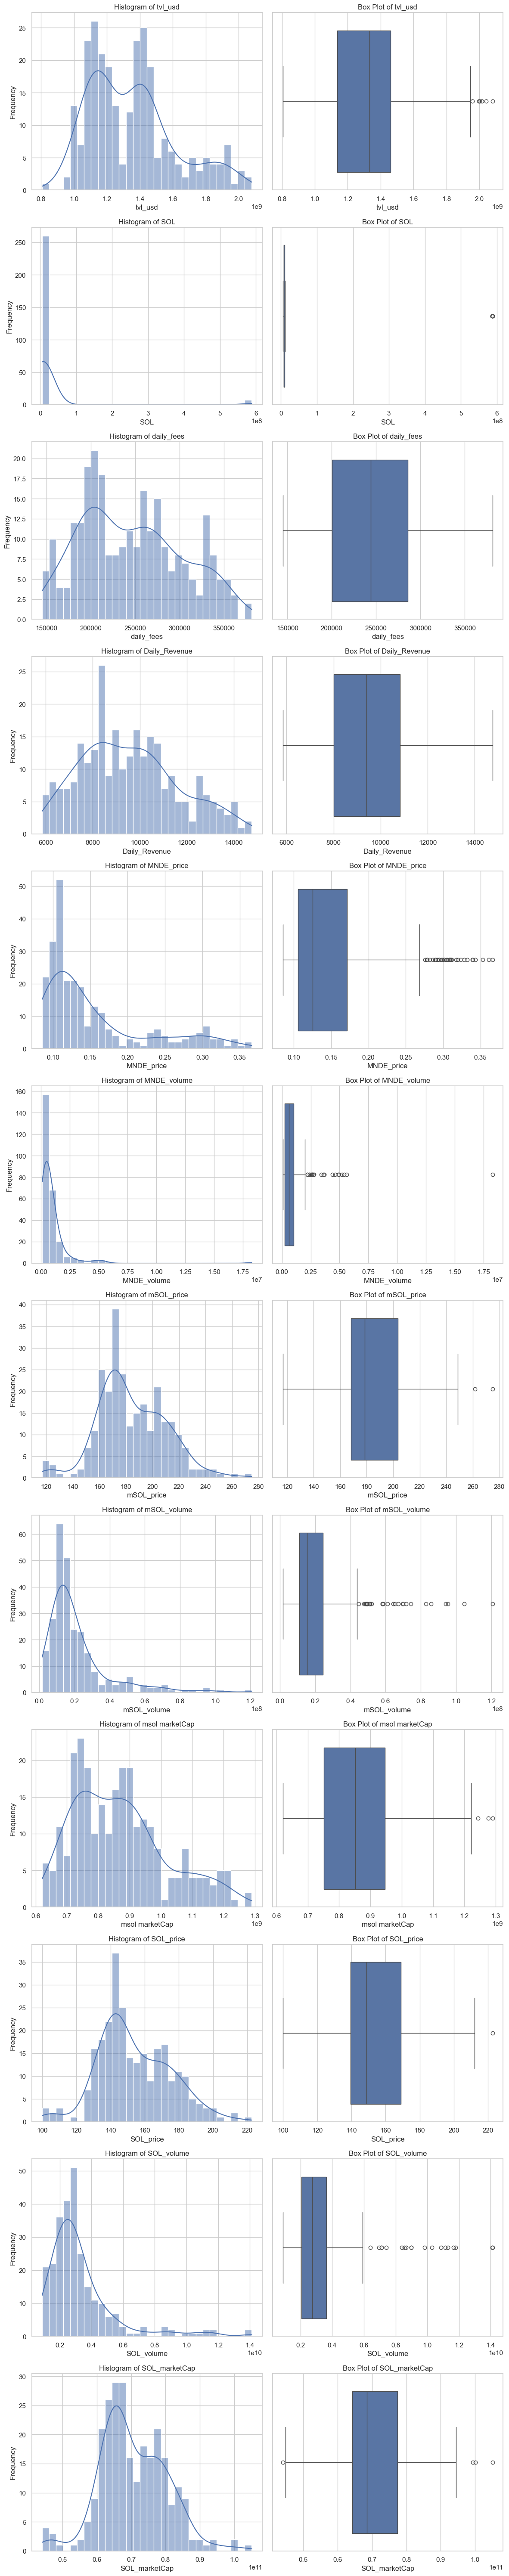

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame

# Set the style for seaborn
sns.set(style="whitegrid")

# Get numerical columns
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Create a figure for histograms and box plots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(12, 5 * len(numerical_columns)))

# Loop through numerical columns to create histograms and box plots
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(merged_df[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=merged_df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_xlabel(column)

    # Calculate and display skewness and kurtosis
    skewness = merged_df[column].skew()
    kurtosis = merged_df[column].kurtosis()
    print(f"{column} - Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")

# Adjust layout
plt.tight_layout()
plt.show()

### Data Presentation and Plotting Analysis


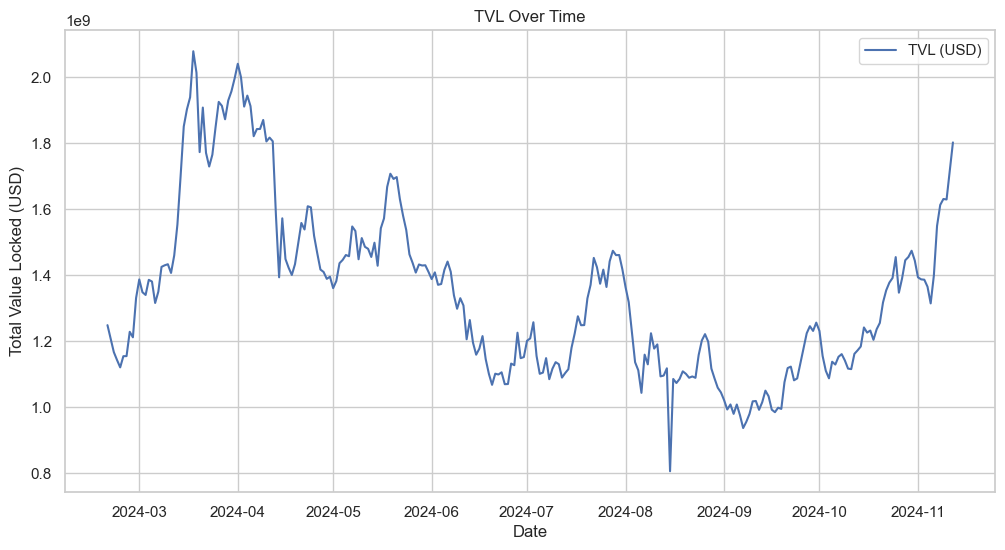

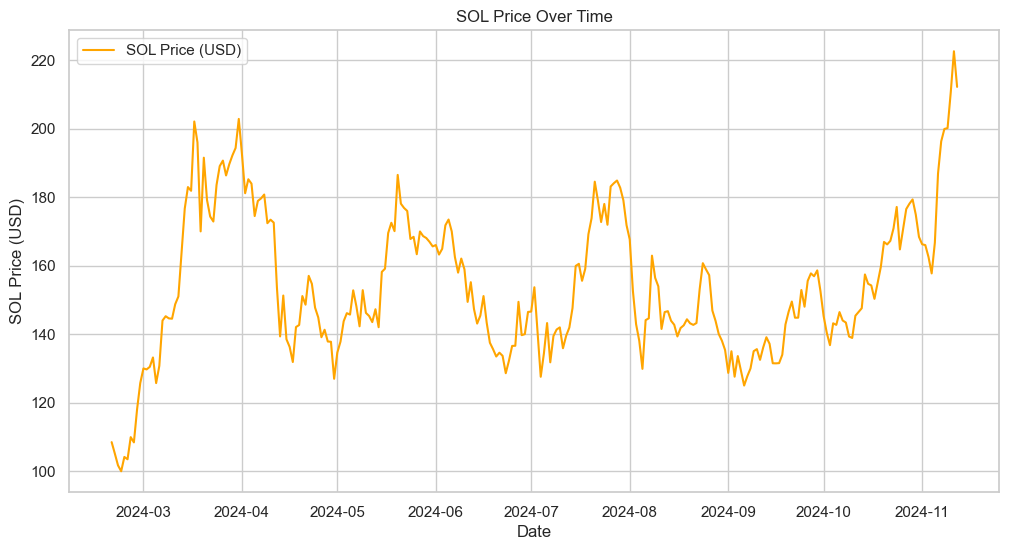

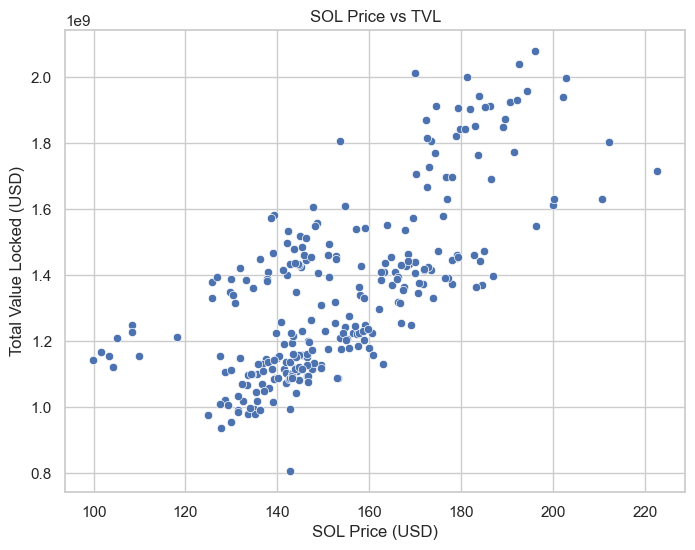

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot TVL over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['tvl_usd'], label='TVL (USD)')
plt.xlabel('Date')
plt.ylabel('Total Value Locked (USD)')
plt.title('TVL Over Time')
plt.legend()
plt.show()

# Plot SOL Price over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['SOL_price'], label='SOL Price (USD)', color='orange')
plt.xlabel('Date')
plt.ylabel('SOL Price (USD)')
plt.title('SOL Price Over Time')
plt.legend()
plt.show()

# Scatter plot to visualize relationship between SOL Price and TVL
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SOL_price', y='tvl_usd', data=merged_df)
plt.xlabel('SOL Price (USD)')
plt.ylabel('Total Value Locked (USD)')
plt.title('SOL Price vs TVL')
plt.show()


### TVL and Daily Revenue Over Time

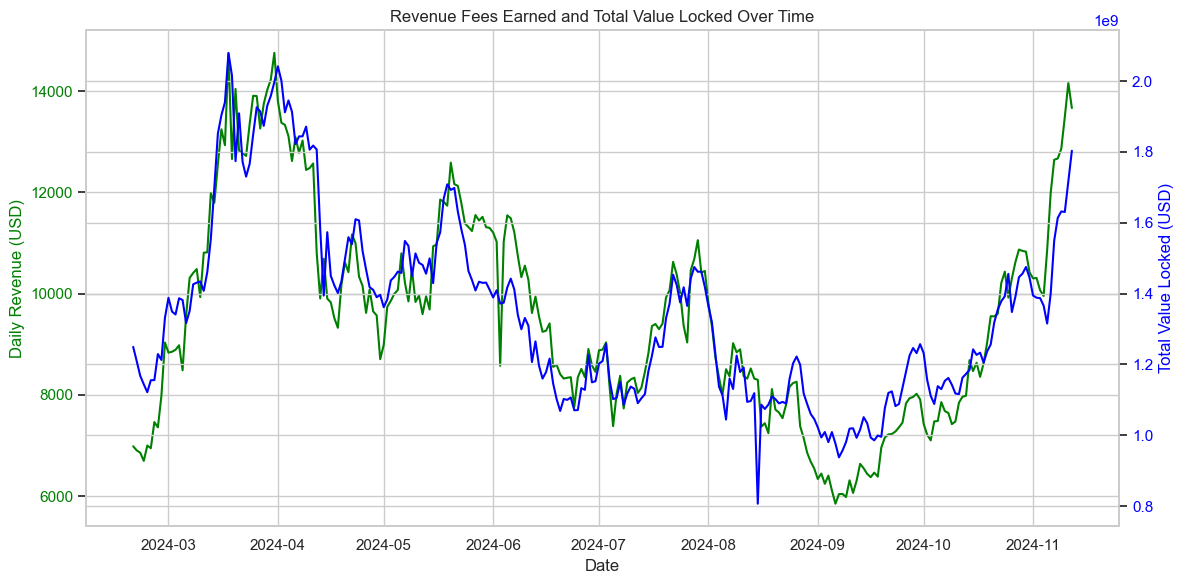

In [134]:
# Plot revenue fees and total value locked over time with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Daily Revenue on primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Revenue (USD)', color='green')
ax1.plot(merged_df['date'], merged_df['Daily_Revenue'], label='Daily Revenue', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a secondary y-axis for Total Value Locked
ax2 = ax1.twinx()
ax2.set_ylabel('Total Value Locked (USD)', color='blue')
ax2.plot(merged_df['date'], merged_df['tvl_usd'], label='Total Value Locked (USD)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and show the plot
plt.title('Revenue Fees Earned and Total Value Locked Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Scatter plot of MNDE Price on TVL


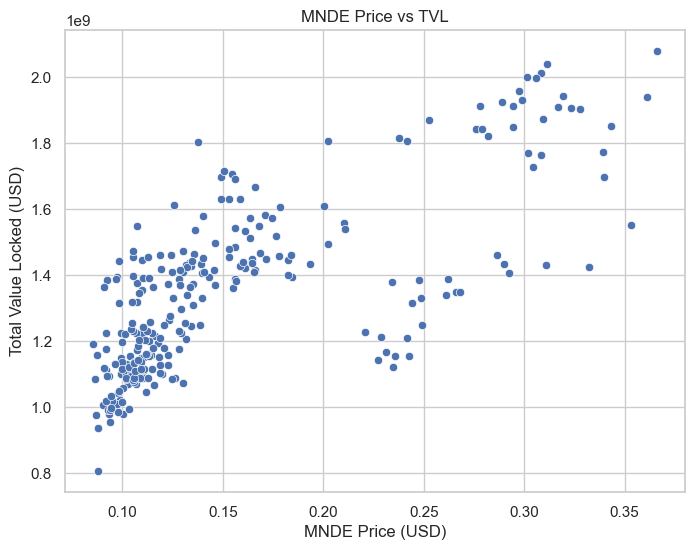

In [135]:

# Scatter plot for MNDE_price vs TVL
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MNDE_price', y='tvl_usd', data=merged_df)
plt.xlabel('MNDE Price (USD)')
plt.ylabel('Total Value Locked (USD)')
plt.title('MNDE Price vs TVL')
plt.show()

### Data Visualization of Daily Revenue and TVL


### SOL Price, TVL, and MNDE Price Over Time

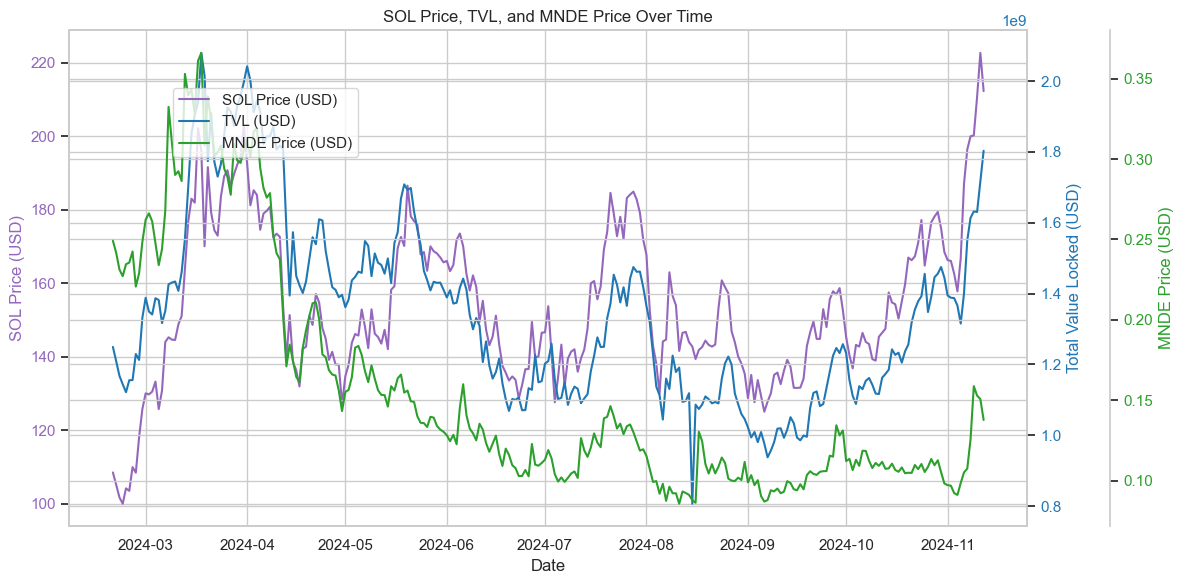

In [136]:
import matplotlib.pyplot as plt

# Verify 'date' column is datetime type
if not pd.api.types.is_datetime64_any_dtype(merged_df['date']):
    merged_df['date'] = pd.to_datetime(merged_df['date'])

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# SOL price on the first y-axis
color = 'tab:purple'
ax1.set_xlabel('Date')
ax1.set_ylabel('SOL Price (USD)', color=color)
ax1.plot(merged_df['date'], merged_df['SOL_price'], label='SOL Price (USD)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# y-axis for TVL
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Value Locked (USD)', color=color)
ax2.plot(merged_df['date'], merged_df['tvl_usd'], label='TVL (USD)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# y-axis for MNDE Price
ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('MNDE Price (USD)', color=color)
ax3.plot(merged_df['date'], merged_df['MNDE_price'], label='MNDE Price (USD)', color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Title and legends
plt.title('SOL Price, TVL, and MNDE Price Over Time')
fig.tight_layout()

# Create combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
plt.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

### Correlation Matrix Heatmap

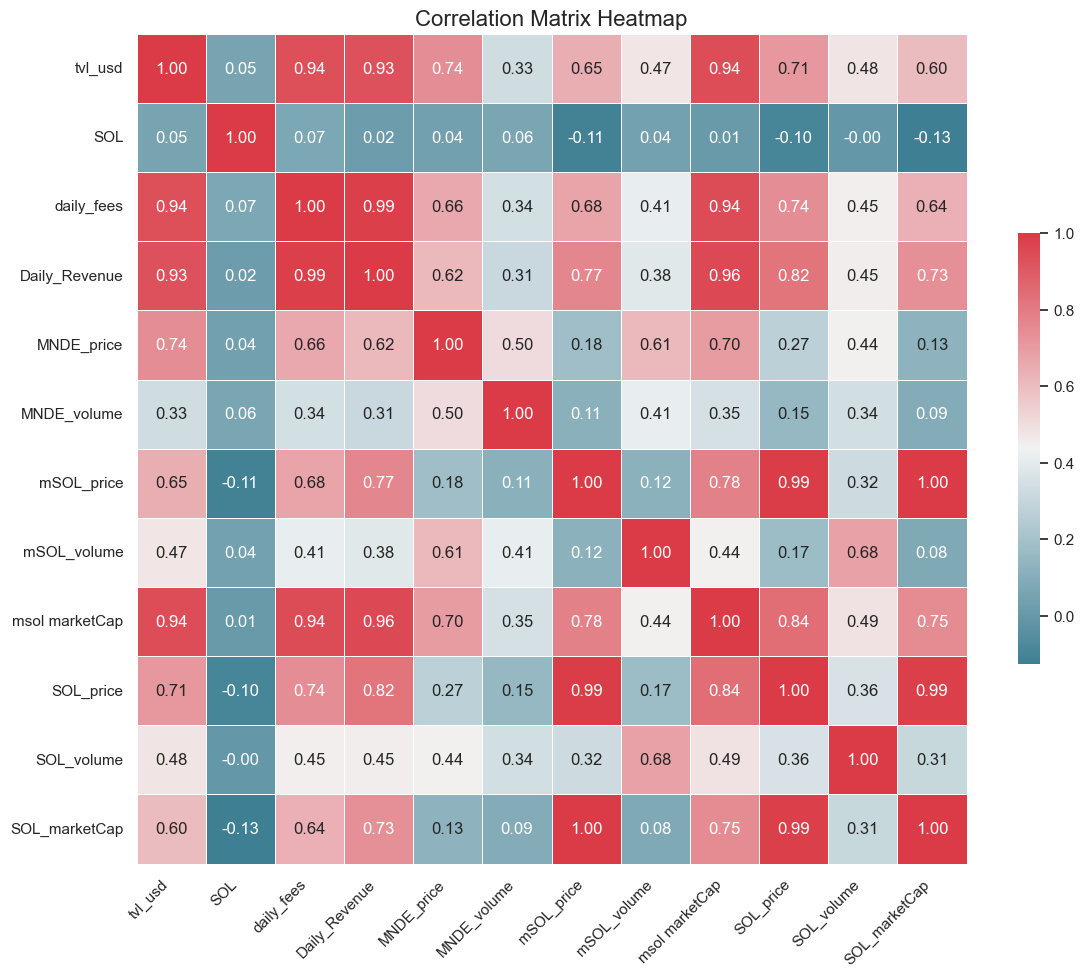

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = merged_df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Pearson Correlation

In [138]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

# Compute Pearson correlations
corr_mnde_tvl, p_mnde_tvl = pearsonr(merged_df['MNDE_price'], merged_df['tvl_usd'])
corr_mnde_sol, p_mnde_sol = pearsonr(merged_df['MNDE_price'], merged_df['SOL_price'])
corr_sol_tvl, p_sol_tvl = pearsonr(merged_df['SOL_price'], merged_df['tvl_usd'])

print(f"Pearson Correlation between MNDE_price and TVL: {corr_mnde_tvl:.4f} (p-value: {p_mnde_tvl:.4e})")
print(f"Pearson Correlation between MNDE_price and SOL_price: {corr_mnde_sol:.4f} (p-value: {p_mnde_sol:.4e})")
print(f"Pearson Correlation between SOL_price and TVL: {corr_sol_tvl:.4f} (p-value: {p_sol_tvl:.4e})")

# Calculate Partial Correlation
numerator = corr_mnde_tvl - (corr_mnde_sol * corr_sol_tvl)
denominator = np.sqrt((1 - corr_mnde_sol**2) * (1 - corr_sol_tvl**2))
partial_corr = numerator / denominator

print(f"\nPartial Correlation between MNDE_price and TVL (controlling for SOL_price): {partial_corr:.4f}")

Pearson Correlation between MNDE_price and TVL: 0.7429 (p-value: 4.1686e-48)
Pearson Correlation between MNDE_price and SOL_price: 0.2720 (p-value: 6.5161e-06)
Pearson Correlation between SOL_price and TVL: 0.7132 (p-value: 8.8347e-43)

Partial Correlation between MNDE_price and TVL (controlling for SOL_price): 0.8138


### Linear Regression Analysis

In [167]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dependent variable
y = merged_df['tvl_usd']

# Define the independent variables by dropping the target variable from merged_df
X = merged_df.drop(columns=['tvl_usd', 'date'])

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
display(model.summary())

# Display the p-values
print("\nP-values of the coefficients:")
display(model.pvalues)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tvl_usd   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     323.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.75e-143
Time:                        15:45:26   Log-Likelihood:                -5192.0
No. Observations:                 267   AIC:                         1.041e+04
Df Residuals:                     255   BIC:                         1.045e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.799e+08   4.13e+07      4.360      0.000    9.86e+07    2.61e+08
SOL                0.0266      0.048      0.551      0.582      -0.068       0.121
daily_fees        -8.8219    924.856     -0.010      0.992   -1830.150    1812.506
Daily_Revenue   5.118e+04    2.5e+04      2.050      0.041    2007.758       1e+05
MNDE_price       3.61e+08   2.19e+08      1.652      0.100   -6.94e+07    7.91e+08
MNDE_volume       -8.4181      3.682     -2.286      0.023     -15.670      -1.166
mSOL_price      1.927e+07   4.14e+06      4.648      0.000    1.11e+07    2.74e+07
mSOL_volume        0.0069      0.371      0.018      0.985      -0.724       0.738
msol marketCap     0.3646      0.240      1.521      0.130      -0.108       0.837
SOL_price        1.23e+07   4.72e+06      2.609      0.010    3.02e+06    2.16e+07
SOL_volume         0.0044      0.003      1.512      0.132      -0.001       0.010
SOL_marketCap     -0.0730      0.014     -5.373      0.000      -0.100      -0.046
==============================================================================
Omnibus:                       29.453   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.747
Skew:                          -0.223   Prob(JB):                     9.06e-30
Kurtosis:                       6.438   Cond. No.                     3.70e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


P-values of the coefficients:


const            0.00
SOL              0.58
daily_fees       0.99
Daily_Revenue    0.04
MNDE_price       0.10
MNDE_volume      0.02
mSOL_price       0.00
mSOL_volume      0.99
msol marketCap   0.13
SOL_price        0.01
SOL_volume       0.13
SOL_marketCap    0.00
dtype: float64

### XGboosted Predicitive Model

In [160]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

xgboost_df = merged_df

# Assuming xgboost_df is your DataFrame and 'tvl_usd' is the target variable
target = 'tvl_usd'

# Convert the 'date' column to datetime if it's not already
xgboost_df['date'] = pd.to_datetime(xgboost_df['date'])


# Drop the original 'date' column
xgboost_df = xgboost_df.drop(columns=['date'])

# Define the feature variables (excluding the target variable)
features = xgboost_df.drop(columns=[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, xgboost_df[target], test_size=0.4, random_state=42)

# Create the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.1, max_depth=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

print("Variables used in the XGBoost model:")
display(features.columns.tolist())

Mean Squared Error: 4944675466107425.0
R^2 Score: 0.9115340332095224
Variables used in the XGBoost model:


['SOL',
 'daily_fees',
 'Daily_Revenue',
 'MNDE_price',
 'MNDE_volume',
 'mSOL_price',
 'mSOL_volume',
 'msol marketCap',
 'SOL_price',
 'SOL_volume',
 'SOL_marketCap']